### Suma Marri

#### Problem 1: Linear Regression Model

In [1]:
# Import necessary packages to the jupyter notebook
# Implement a Linear Regression model using both Normal Equation Method and SGD
import pandas as pd
import numpy as np
from pandas import read_csv

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# read and load the csv data file
filename = "Dataset/AMZN.csv"
data = read_csv ( filename )

# Get the Adjusted Close Price
data_select = data [['Adj Close']]

# converting the dataset to a numpy array
values = data_select.values

In [2]:
from pandas import DataFrame
from pandas import concat

"""
Frame a time series as a supervised learning dataset .
Arguments :
data : Sequence of observations as a list or NumPy array .
n_in : Number of lag observations as input (X).
n_out : Number of observations as output (y).
dropnan : Boolean whether or not to drop rows with NaN values .
Returns :
Pandas DataFrame of series framed for supervised learning .
"""

def series_to_supervised ( data , n_in =1 , n_out =1 , dropnan = True ):
    n_vars = 1 if type ( data ) is list else data . shape [1]
    df = DataFrame ( data )
    cols , names = list () , list ()
    # input sequence (t-n, ... t-1)
    for i in range ( n_in , 0 , -1 ):
        cols . append ( df . shift ( i ) )
        names += [('var %d(t-%d)' % ( j+1 , i ) ) for j in range ( n_vars )]
    # forecast sequence (t, t+1, ... t+n)
    for i in range (0 , n_out ):
        cols.append ( df . shift (-i ) )
        if i == 0:
            names += [('var%d(t)' % ( j+1 ) ) for j in range ( n_vars )]
        else :
            names += [('var%d(t+%d)' % ( j+1 , i ) ) for j in range ( n_vars )]
    # put it all together
    agg = concat ( cols , axis =1 )
    agg.columns = names
    # drop rows with NaN values
    if dropnan :
        agg.dropna( inplace = True )
    return agg

###### (a) 
Use the Python function named series_to_supervised() that takes a univariate or multivariate time series and frames it as a supervised learning dataset.

In [3]:
series_to_supervised(data_select, n_in=10, n_out=1, dropnan=True)

,var 1(t-10),var 1(t-9),var 1(t-8),var 1(t-7),var 1(t-6),var 1(t-5),var 1(t-4),var 1(t-3),var 1(t-2),var 1(t-1),var1(t)
10,1.958333,1.729167,1.708333,1.635417,1.427083,1.395833,1.500000,1.583333,1.531250,1.505208,1.500000
11,1.729167,1.708333,1.635417,1.427083,1.395833,1.500000,1.583333,1.531250,1.505208,1.500000,1.510417
12,1.708333,1.635417,1.427083,1.395833,1.500000,1.583333,1.531250,1.505208,1.500000,1.510417,1.479167
13,1.635417,1.427083,1.395833,1.500000,1.583333,1.531250,1.505208,1.500000,1.510417,1.479167,1.416667
14,1.427083,1.395833,1.500000,1.583333,1.531250,1.505208,1.500000,1.510417,1.479167,1.416667,1.541667
...,...,...,...,...,...,...,...,...,...,...,...
5753,1676.609985,1785.000000,1689.150024,1807.839966,1830.000000,1880.930054,1846.089966,1902.829956,1940.099976,1885.839966,1955.489990
5754,1785.000000,1689.150024,1807.839966,1830.000000,1880.930054,1846.089966,1902.829956,1940.099976,1885.839966,1955.489990,1900.099976
5755,1689.150024,1807.839966,1830.000000,1880.930054,1846.089966,1902.829956,1940.099976,1885.839966,1955.489990,1900.099976,1963.949951
5756,1807.839966,1830.000000,1880.930054,1846.089966,1902.829956,1940.099976,1885.839966,1955.489990,1900.099976,1963.949951,1949.719971


In [4]:
supervised_data = series_to_supervised(data_select, n_in=10, n_out=1, dropnan=True)
supervised_data

,var 1(t-10),var 1(t-9),var 1(t-8),var 1(t-7),var 1(t-6),var 1(t-5),var 1(t-4),var 1(t-3),var 1(t-2),var 1(t-1),var1(t)
10,1.958333,1.729167,1.708333,1.635417,1.427083,1.395833,1.500000,1.583333,1.531250,1.505208,1.500000
11,1.729167,1.708333,1.635417,1.427083,1.395833,1.500000,1.583333,1.531250,1.505208,1.500000,1.510417
12,1.708333,1.635417,1.427083,1.395833,1.500000,1.583333,1.531250,1.505208,1.500000,1.510417,1.479167
13,1.635417,1.427083,1.395833,1.500000,1.583333,1.531250,1.505208,1.500000,1.510417,1.479167,1.416667
14,1.427083,1.395833,1.500000,1.583333,1.531250,1.505208,1.500000,1.510417,1.479167,1.416667,1.541667
...,...,...,...,...,...,...,...,...,...,...,...
5753,1676.609985,1785.000000,1689.150024,1807.839966,1830.000000,1880.930054,1846.089966,1902.829956,1940.099976,1885.839966,1955.489990
5754,1785.000000,1689.150024,1807.839966,1830.000000,1880.930054,1846.089966,1902.829956,1940.099976,1885.839966,1955.489990,1900.099976
5755,1689.150024,1807.839966,1830.000000,1880.930054,1846.089966,1902.829956,1940.099976,1885.839966,1955.489990,1900.099976,1963.949951
5756,1807.839966,1830.000000,1880.930054,1846.089966,1902.829956,1940.099976,1885.839966,1955.489990,1900.099976,1963.949951,1949.719971


###### (b) 
Use MinMaxScaler to scale your data

In [5]:
scaler = MinMaxScaler()
supervised_data = scaler.fit_transform(supervised_data)

###### (c)
Use the Normal Equation Method to find the linear regression coefficients (w). To perform this you may want to take the following steps first: Split your data to X and Y by taking the columns var1(t-10),...,var(t-1) as your 10 features in X, and take the last column var1(t) as your target (Y). Expand your matrix X with a bias vector of ones as the first column (to accomplish this, you may want to use the numpy operations np.ones , np.reshape and np.append). Use the train test split with ‘random state=1’ to split your data to 70% training, and 30% test data. Solve the Normal Equation Method in (2) to find the coefficients w.

In [6]:
Y = supervised_data[:,-1]
X = supervised_data[:,0:-1]

In [7]:
print(X.shape)
print(Y.shape)

(5748, 10)
(5748,)


In [42]:
def normalEquation(X, Y):
    m = int(np.size(data_select.iloc[:, -1]))

    # This is the feature / parameter (2x2) vector that will
    # contain my minimized values
    theta = []

    # I create a bias_vector to add to my newly created X vector
    bias_vector = np.ones((m, 1))

    # I need to reshape my original X(m,) vector so that I can
    # manipulate it with my bias_vector; they need to share the same
    # dimensions.
    X = np.arange(12480).reshape(1248, 10)
    X = np.reshape(X, (m, 1))

    # I combine these two vectors together to get a (m, 2) matrix
    X = np.append(bias_vector, X, axis=1)

    # Normal Equation:
    # theta = inv(X^T * X) * X^T * y

    # For convenience I create a new, tranposed X matrix
    X_transpose = np.transpose(X)

    # Calculating theta
    theta = np.linalg.inv(X_transpose.dot(X))
    theta = theta.dot(X_transpose)
    theta = theta.dot(y)

    return theta

p = normalEquation(X, Y)

ValueError: cannot reshape array of size 12480 into shape (5758,1)

###### (d)
Make a prediction on your test set using the linear regression function f(x) = wT x, and use both the mean square error and coefficient of determination R2 to measure the performance of your prediction model. For this use fucntions mean squared error and r2 score from sklearn library

#### Problem 2
Create a Perceptron model with an optimal value of hyperparameter α (learning rate of SGD)

In [8]:
# Import necessary packages to the Jupyter notebook
# Implement a Perceptron algorithm with an optimal value of learning rate
import pandas as pd
import numpy as np
from pandas import read_csv

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron

# read and load the csv data file
filename = "Dataset/sonar.all-data.csv"
dataframe = read_csv (filename)

# converting the dataset to a numpy array
array = dataframe . values

# separate array into input and output components
X = array [:,:-1]
Y = array [:,-1]

###### (a)
Split your data into train and test portions with ‘test size = 0.3’ and ’random state = 3’ . Define your learning model to be Perceptron. Use RepeatedStratifiedKFold with ‘n splits=10’, ‘n repeats=5’, and ‘random state=1’ as your model evaluation method. 

In [9]:
model = Perceptron()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)
model.fit(X_train, Y_train)

Perceptron()

In [10]:
# define model
model = Perceptron()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

###### (b)
Use GridSearchCV to perform a gird search on the parameter of Perceptron algorithm (learning rate α in SGD), consider values for α as [0.0001, 0.001, 0.01, 0.1]. For your GridSearch, use data only from your training sets (X-train, Y_train).

In [11]:
# define grid
grid = dict()
grid['alpha'] = [0.0001, 0.001, 0.01, 0.1]

In [12]:
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, Y_train)

###### (c)
Report the best score and the best value of the parameter in your search.

In [13]:
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.664
Config: {'alpha': 0.0001}


###### (d)
Create a Perceptron model which takes as an argument the best value of parameter you found in the previous step, and use this model to make predictions on your test set; Report the accuracy.

In [14]:
clf = Perceptron(alpha=0.0001)
results = clf.fit(X_train, Y_train)
results.score(X_train, Y_train)

0.7172413793103448

If you see in part c, we used the attribute best_score_ on GridSearchCV to find the mean accuracy or the mean cross-validated score of the best estimator, which was about 0.664. We also used the best_params_ attribute to find the 
parameter setting that gave the best results on the hold out data, which happened to be 0.0001 in this example. 
Then, when we used the score() method on the Perceptron model. The score() method returns the mean accuracy on the given test data and labels. We got a mean accuracy of about 0.712, which is higher than the mean accuracy of the GridSearch.

#### Problem 3: Create a KNN model with an optimal value of hyperparameter K (the number of nearest neighbors)

In [15]:
# import necessary packages to the Jupyter notebook
# Create a KNN model with the best parameter K
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt

from pandas import read_csv
from sklearn . model_selection import train_test_split
from sklearn . metrics import accuracy_score
from sklearn . neighbors import KNeighborsClassifier

# read and load the csv data file
filename = "Dataset/sonar.all-data.csv"
dataframe = read_csv (filename)

# converting the dataset to a numpy array
array = dataframe . values

# separate array into input and output components
X = array [:,:-1]
Y = array [:,-1]

###### (a) 
Split the data into train and test sets with 'test_size = 0.3', and 'random_state = 5'. Create a KNN model with parameter 'n_neighbor' varying from 1 to 30 (see the code from Lab Session 6).

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 5)

In [17]:
scores = {}
for k in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)
  y_pred = knn.predict(X_test)
  scores[k] = accuracy_score(y_pred, Y_test)

In [18]:
scores

{1: 0.7777777777777778,
 2: 0.7142857142857143,
 3: 0.7301587301587301,
 4: 0.7142857142857143,
 5: 0.746031746031746,
 6: 0.746031746031746,
 7: 0.6507936507936508,
 8: 0.6349206349206349,
 9: 0.6666666666666666,
 10: 0.6666666666666666,
 11: 0.6825396825396826,
 12: 0.6507936507936508,
 13: 0.6666666666666666,
 14: 0.6507936507936508,
 15: 0.6825396825396826,
 16: 0.6666666666666666,
 17: 0.6507936507936508,
 18: 0.6666666666666666,
 19: 0.6507936507936508,
 20: 0.7142857142857143,
 21: 0.6825396825396826,
 22: 0.6825396825396826,
 23: 0.6984126984126984,
 24: 0.6825396825396826,
 25: 0.6825396825396826,
 26: 0.6825396825396826,
 27: 0.6666666666666666,
 28: 0.6984126984126984,
 29: 0.7142857142857143}

###### (b)
Plot the accuracy of the KNN model in terms of the number of nearest neighbor k varying from 1 to 30. Choose and report the best value for k.

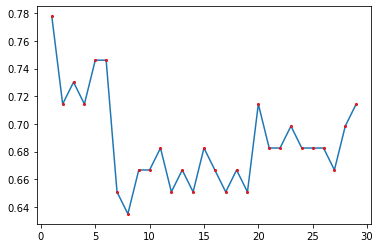

In [19]:
plt.plot(list(scores.keys()),list(scores.values()),marker="o", markersize=2, markeredgecolor="red")

After running the KNeighborsClassifier with diffrent number of neighbors (1 -30), we can see that the best value of k is 1. If you see the list of accuracy classification scores and the line graph, you can see that k=1 has the highest  accuracy. Then 5 and 6 would be the next best values for k. 

###### (c)
Create a new KNN model with the best values of nearest neighbors that you found in previous step, and perform prediction on your test set. Report the accuracy of the model.

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
knn.score(X_train, Y_train)

1.0

In [21]:
y_pred = knn.predict(X_test)
score = accuracy_score(y_pred, Y_test)
score

0.7777777777777778

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
knn.score(X_train, Y_train)

0.8344827586206897

In [23]:
y_pred = knn.predict(X_test)
score = accuracy_score(y_pred, Y_test)
score

0.746031746031746

In [24]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, Y_train)
knn.score(X_train, Y_train)

0.8275862068965517

In [25]:
y_pred = knn.predict(X_test)
score = accuracy_score(y_pred, Y_test)
score

0.746031746031746

When I take the KNeighborsClassifier and use the score method, I get the mean accuracy of the data. However, I found this unreliable, because it is checking if it is an exact match of X_train to get high accuracy. That is why the accuracy_score(y_pred, Y_test) was a better test. I choosed the 3 highest accuracy's (k = 1, 5, & 6). k = 1 was the highest and 5/6 tied for 2nd. 